In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [2]:
Path.BASE_PATH = path

In [3]:
print(path)

/home/mzums/.fastai/data/oxford-iiit-pet


In [4]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [5]:
(path/"images").ls()

(#7393) [Path('images/english_setter_2.jpg'),Path('images/basset_hound_50.jpg'),Path('images/american_pit_bull_terrier_107.jpg'),Path('images/american_bulldog_82.jpg'),Path('images/yorkshire_terrier_21.jpg'),Path('images/Abyssinian_33.jpg'),Path('images/leonberger_155.jpg'),Path('images/Bombay_139.jpg'),Path('images/japanese_chin_111.jpg'),Path('images/keeshond_195.jpg')...]

In [6]:
fname = (path/"images").ls()[0]

In [7]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['english_setter']

In [8]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

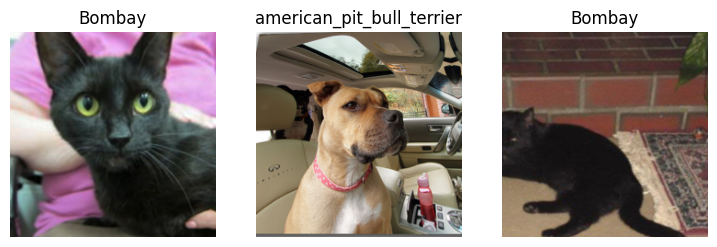

In [9]:
dls.show_batch(nrows=1, ncols=3)

In [10]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
